# Pandas Basics

In [72]:
import numpy as np
import pandas as pd

In [73]:
df = pd.DataFrame([10,20,30,40],
                 columns = ['numbers'],
                 index = ['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [74]:
df.index # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [75]:
df.columns # the column names

Index([u'numbers'], dtype='object')

In [76]:
df.ix['c'] # selection via index

numbers    30
Name: c, dtype: int64

In [77]:
df.ix[['a', 'd']] # selection of multiple indices

,numbers
a,10
d,40


In [78]:
df.ix[df.index[1:3]] # selection via index object

,numbers
b,20
c,30


In [79]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [80]:
df.apply(lambda x: x**2) # square every element

,numbers
a,100
b,400
c,900
d,1600


In [81]:
df ** 2  # again square: Numpy-like

,numbers
a,100
b,400
c,900
d,1600


In [82]:
df['floats'] = (1.5, 2.5, 3.5, 4.5) # new column
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [83]:
df['floats'] # selection of a column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [84]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                          index = ['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [85]:
# if you append, make sure to give an index

df = df.append(pd.DataFrame({'numbers': 100,
                       'floats': 5.75,
                       'names': 'Henry'},
                      index = ['z', ]))


# This is a temporary df

In [86]:
df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a', 'b', 'c', 'd', 'y'],
                    columns = ['squares',]))

# by default this is an inner join and we lose data

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
z,5.75,Henry,100,NaN


In [87]:
df = df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a', 'b', 'c', 'd', 'y'],
                    columns = ['squares',]),
       how = 'outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
y,NaN,NaN,NaN,25
z,5.75,Henry,100,NaN


In [88]:
df[['numbers', 'squares']].mean()  # column-wise mean

numbers    40
squares    11
dtype: float64

In [89]:
df[['numbers', 'squares']].std() # column-wise std dev

numbers    35.355339
squares     9.669540
dtype: float64

In [90]:
a = np.random.standard_normal((9,4))
a.round(6)  # rounds elements to 6 figures

array([[ -8.36160000e-01,  -4.96319000e-01,  -1.77599500e+00,
         -1.16986500e+00],
       [  4.64023000e-01,   6.51285000e-01,  -8.87090000e-02,
          1.16166000e+00],
       [ -3.57549000e-01,   8.84590000e-01,  -5.00000000e-04,
         -1.20461000e-01],
       [  6.90297000e-01,  -1.68709000e-01,  -6.58322000e-01,
          4.11281000e-01],
       [ -3.14597000e-01,  -2.00070300e+00,   9.53690000e-01,
          1.10909800e+00],
       [ -9.99805000e-01,   6.86501000e-01,   7.44711000e-01,
         -7.12637000e-01],
       [  8.09939000e-01,   6.71154000e-01,  -1.93155000e+00,
          5.31583000e-01],
       [  2.55832000e-01,   2.89936000e-01,   8.45656000e-01,
         -3.31904000e-01],
       [ -1.37140100e+00,  -5.74450000e-01,  -3.90536000e-01,
          6.42929000e-01]])

In [92]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.836160,-0.496319,-1.775995,-1.169865
1,0.464023,0.651285,-0.088709,1.161660
2,-0.357549,0.884590,-0.000500,-0.120461
3,0.690297,-0.168709,-0.658322,0.411281
4,-0.314597,-2.000703,0.953690,1.109098
5,-0.999805,0.686501,0.744711,-0.712637
6,0.809939,0.671154,-1.931550,0.531583
7,0.255832,0.289936,0.845656,-0.331904
8,-1.371401,-0.574450,-0.390536,0.642929


In [93]:
df.columns = [['No1', 'No2', 'No3', 'No4']]  # add col names
df

,No1,No2,No3,No4
0,-0.836160,-0.496319,-1.775995,-1.169865
1,0.464023,0.651285,-0.088709,1.161660
2,-0.357549,0.884590,-0.000500,-0.120461
3,0.690297,-0.168709,-0.658322,0.411281
4,-0.314597,-2.000703,0.953690,1.109098
5,-0.999805,0.686501,0.744711,-0.712637
6,0.809939,0.671154,-1.931550,0.531583
7,0.255832,0.289936,0.845656,-0.331904
8,-1.371401,-0.574450,-0.390536,0.642929


In [95]:
df['No2'][3]

-0.16870934355357189

In [96]:
dates = pd.date_range('2015-1-1',
                     periods = 9,
                     freq = 'M')
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-01-31, ..., 2015-09-30]
Length: 9, Freq: M, Timezone: None

In [98]:
df.index = dates  # assign dates as index
df

,No1,No2,No3,No4
2015-01-31,-0.836160,-0.496319,-1.775995,-1.169865
2015-02-28,0.464023,0.651285,-0.088709,1.161660
2015-03-31,-0.357549,0.884590,-0.000500,-0.120461
2015-04-30,0.690297,-0.168709,-0.658322,0.411281
2015-05-31,-0.314597,-2.000703,0.953690,1.109098
2015-06-30,-0.999805,0.686501,0.744711,-0.712637
2015-07-31,0.809939,0.671154,-1.931550,0.531583
2015-08-31,0.255832,0.289936,0.845656,-0.331904
2015-09-30,-1.371401,-0.574450,-0.390536,0.642929


In [99]:
np.array(df).round(6)  # convert df to ndarray

array([[ -8.36160000e-01,  -4.96319000e-01,  -1.77599500e+00,
         -1.16986500e+00],
       [  4.64023000e-01,   6.51285000e-01,  -8.87090000e-02,
          1.16166000e+00],
       [ -3.57549000e-01,   8.84590000e-01,  -5.00000000e-04,
         -1.20461000e-01],
       [  6.90297000e-01,  -1.68709000e-01,  -6.58322000e-01,
          4.11281000e-01],
       [ -3.14597000e-01,  -2.00070300e+00,   9.53690000e-01,
          1.10909800e+00],
       [ -9.99805000e-01,   6.86501000e-01,   7.44711000e-01,
         -7.12637000e-01],
       [  8.09939000e-01,   6.71154000e-01,  -1.93155000e+00,
          5.31583000e-01],
       [  2.55832000e-01,   2.89936000e-01,   8.45656000e-01,
         -3.31904000e-01],
       [ -1.37140100e+00,  -5.74450000e-01,  -3.90536000e-01,
          6.42929000e-01]])

In [100]:
df.values  # get the values of the df

array([[ -8.36160167e-01,  -4.96318882e-01,  -1.77599546e+00,
         -1.16986452e+00],
       [  4.64022812e-01,   6.51284535e-01,  -8.87087575e-02,
          1.16166017e+00],
       [ -3.57549069e-01,   8.84589524e-01,  -4.99807400e-04,
         -1.20460811e-01],
       [  6.90296640e-01,  -1.68709344e-01,  -6.58321754e-01,
          4.11281189e-01],
       [ -3.14596695e-01,  -2.00070322e+00,   9.53690072e-01,
          1.10909838e+00],
       [ -9.99805343e-01,   6.86500855e-01,   7.44711207e-01,
         -7.12637495e-01],
       [  8.09938881e-01,   6.71154190e-01,  -1.93154967e+00,
          5.31582685e-01],
       [  2.55832270e-01,   2.89935611e-01,   8.45656153e-01,
         -3.31904475e-01],
       [ -1.37140053e+00,  -5.74449815e-01,  -3.90535873e-01,
          6.42929345e-01]])

In [101]:
df.describe() # short cut to statistics

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.184380,-0.006302,-0.255728,0.169076
std,0.783712,0.923290,1.064748,0.805331
min,-1.371401,-2.000703,-1.931550,-1.169865
25%,-0.836160,-0.496319,-0.658322,-0.331904
50%,-0.314597,0.289936,-0.088709,0.411281
75%,0.464023,0.671154,0.744711,0.642929
max,0.809939,0.884590,0.953690,1.161660


In [102]:
np.sqrt(df).sum()

No1    2.917798
No2    3.933798
No3    2.759133
No4    4.303179
dtype: float64

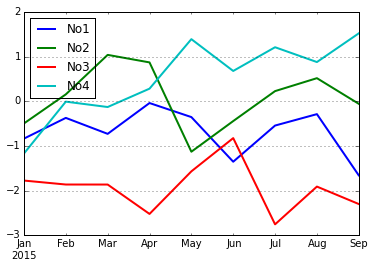

In [103]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

In [104]:
type(df)

pandas.core.frame.DataFrame

In [106]:
df['No1']  # extracting a series

2015-01-31   -0.836160
2015-02-28    0.464023
2015-03-31   -0.357549
2015-04-30    0.690297
2015-05-31   -0.314597
2015-06-30   -0.999805
2015-07-31    0.809939
2015-08-31    0.255832
2015-09-30   -1.371401
Freq: M, Name: No1, dtype: float64

In [107]:
type(df['No1'])

pandas.core.series.Series

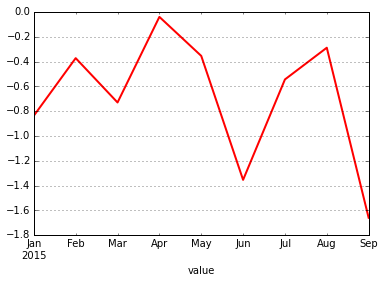

In [108]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style = 'r',
                       lw= 2.)
plt.xlabel('date')
plt.xlabel('value')

In [109]:
# GroupBy operations

df['Quarter'] = ['Q1', 'Q1', 'Q1', 
                 'Q2', 'Q2', 'Q2', 
                 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.836160,-0.496319,-1.775995,-1.169865,Q1
2015-02-28,0.464023,0.651285,-0.088709,1.161660,Q1
2015-03-31,-0.357549,0.884590,-0.000500,-0.120461,Q1
2015-04-30,0.690297,-0.168709,-0.658322,0.411281,Q2
2015-05-31,-0.314597,-2.000703,0.953690,1.109098,Q2
2015-06-30,-0.999805,0.686501,0.744711,-0.712637,Q2
2015-07-31,0.809939,0.671154,-1.931550,0.531583,Q3
2015-08-31,0.255832,0.289936,0.845656,-0.331904,Q3
2015-09-30,-1.371401,-0.574450,-0.390536,0.642929,Q3


In [110]:
groups = df.groupby('Quarter')

In [111]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.243229,0.346518,-0.621735,-0.042888
Q2,-0.208035,-0.494304,0.346693,0.269247
Q3,-0.101876,0.128880,-0.492143,0.280869


In [112]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.464023,0.884590,-0.000500,1.161660
Q2,0.690297,0.686501,0.953690,1.109098
Q3,0.809939,0.671154,0.845656,0.642929


In [113]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [116]:
df['Odd_Even'] = ['Odd', 'Even',
                 'Odd', 'Even',
                 'Odd', 'Even',
                  'Odd', 'Even',
                 'Odd']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2015-01-31,-0.836160,-0.496319,-1.775995,-1.169865,Q1,Odd
2015-02-28,0.464023,0.651285,-0.088709,1.161660,Q1,Even
2015-03-31,-0.357549,0.884590,-0.000500,-0.120461,Q1,Odd
2015-04-30,0.690297,-0.168709,-0.658322,0.411281,Q2,Even
2015-05-31,-0.314597,-2.000703,0.953690,1.109098,Q2,Odd
2015-06-30,-0.999805,0.686501,0.744711,-0.712637,Q2,Even
2015-07-31,0.809939,0.671154,-1.931550,0.531583,Q3,Odd
2015-08-31,0.255832,0.289936,0.845656,-0.331904,Q3,Even
2015-09-30,-1.371401,-0.574450,-0.390536,0.642929,Q3,Odd


In [117]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [118]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

# Financial Data

In [119]:
import pandas.io.data as web

DAX = web.DataReader(name = '^GDAXI',
                    data_source = 'yahoo',
                    start = '2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4081 entries, 2000-01-03 to 2016-01-08
Data columns (total 6 columns):
Open         4081 non-null float64
High         4081 non-null float64
Low          4081 non-null float64
Close        4081 non-null float64
Volume       4081 non-null int64
Adj Close    4081 non-null float64
dtypes: float64(5), int64(1)
memory usage: 223.2 KB


In [120]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,10485.809570,10485.910156,10248.580078,10283.440430,116249000,10283.440430
2016-01-05,10373.269531,10384.259766,10173.519531,10310.099609,82348000,10310.099609
2016-01-06,10288.679688,10288.679688,10094.179688,10214.019531,87751700,10214.019531
2016-01-07,10144.169922,10145.469727,9810.469727,9979.849609,124188100,9979.849609
2016-01-08,10010.469727,10122.459961,9849.339844,9849.339844,95672200,9849.339844


In [121]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] /
                               DAX['Close'][i-1])
    
# this loop is really slow, and it throws errors

CPU times: user 1min 53s, sys: 1.47 s, total: 1min 54s
Wall time: 1min 56s


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
DAX[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2016-01-04,10283.440430,-0.043720
2016-01-05,10310.099609,0.002589
2016-01-06,10214.019531,-0.009363
2016-01-07,9979.849609,-0.023193
2016-01-08,9849.339844,-0.013164


In [123]:
%%time
DAX['Return'] = np.log(DAX['Close'] /
                      DAX['Close'].shift(1))

CPU times: user 1.34 ms, sys: 623 µs, total: 1.96 ms
Wall time: 1.48 ms


In [124]:
DAX[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2016-01-04,10283.440430,-0.043720,-0.043720
2016-01-05,10310.099609,0.002589,0.002589
2016-01-06,10214.019531,-0.009363,-0.009363
2016-01-07,9979.849609,-0.023193,-0.023193
2016-01-08,9849.339844,-0.013164,-0.013164


In [125]:
# delete the loop column
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x107486dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10749d510>], dtype=object)

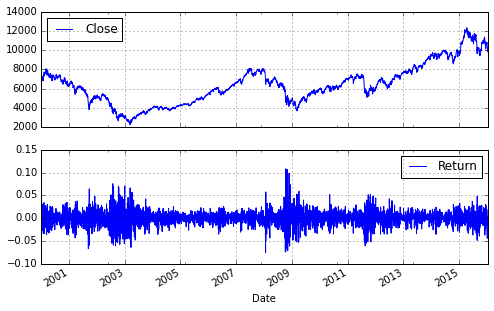

In [126]:
# Look at volatility

DAX[['Close', 'Return']].plot(subplots = True,
                             style = 'b',
                             figsize = (8,5))

In [127]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window = 42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window = 252)
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-01-04,10283.440430,10820.369280,10969.466716
2016-01-05,10310.099609,10805.117606,10972.801793
2016-01-06,10214.019531,10787.566871,10975.563062
2016-01-07,9979.849609,10766.962332,10976.127503
2016-01-08,9849.339844,10742.238514,10976.924487


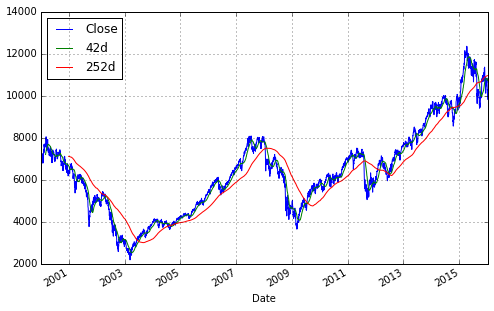

In [128]:
DAX[['Close', '42d', '252d']].plot(figsize = (8,5))

In [129]:
# Options perspective

import math

# moving annual volatility
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'], window = 252) * math.sqrt(252)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x108276650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x108205790>], dtype=object)

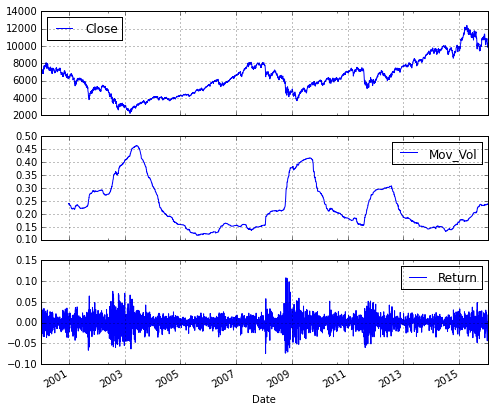

In [130]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True,
                                        style = 'b',
                                        figsize = (8,7))